# Flight Price Prediction (EDA + Feature Engeneering )

### Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

### Reading the dataset

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
## Combining dataset in final_df

final_df = pd.concat([train_df,test_df],ignore_index=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


### Column datatypes

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


### Price vs stop 

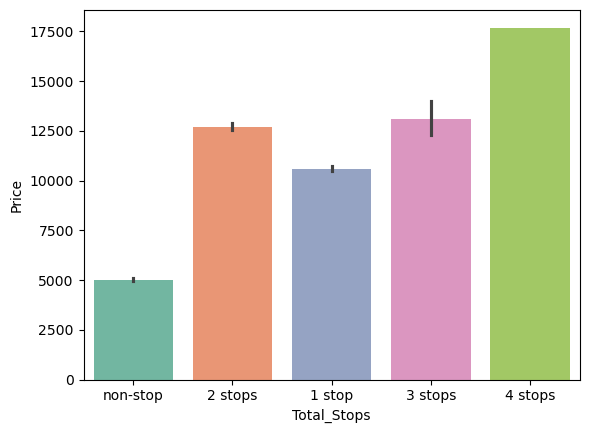

In [9]:
sns.barplot(final_df,x='Total_Stops',y='Price',palette='Set2')
plt.show()

### Observation

1. As number of stops increases price also increases 

### Airlines vs Price

In [10]:
final_df['Airline'].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

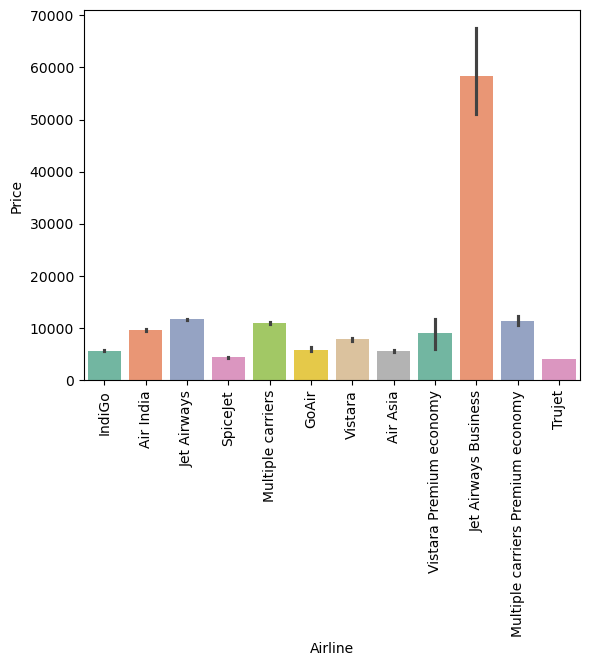

In [13]:
sns.barplot(final_df,x='Airline',y='Price',palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

### Observation

1. Jet Airways Business has the highest average price, significantly higher than all other airlines, indicating premium pricing for business-class flights.
2. Most economy-class airlines (Indigo, Air India, SpiceJet, GoAir, etc.) have relatively similar price ranges, suggesting competitive pricing in the market.
3. Budget airlines like Trujet have the lowest average flight prices, reinforcing their role as low-cost carriers.

## EDA

In [7]:
# split date of journey into date month and year column
final_df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
13349     6
13350    27
13351     6
13352     6
13353    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [8]:
final_df['Date']= final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']= final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']= final_df['Date_of_Journey'].str.split('/').str[2]

In [9]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [10]:
## convert date month and year column in int 

final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.3+ MB


In [12]:
# Drop Date of journey column 

final_df.drop('Date_of_Journey',axis=1,inplace=True)


In [13]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [19]:
# handling Arrival time column

In [15]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [16]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
# extracting hour from min 

final_df['Arrival_Hour'] = final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df['Arrival_Minute'] = final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [18]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [19]:
# Converting arrival_hour and arrival_minute data types

final_df['Arrival_Hour'] = final_df['Arrival_Hour'].astype(int) 
final_df['Arrival_Minute'] = final_df['Arrival_Minute'].astype(int)

In [20]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_Hour     13354 non-null  int32  
 13  Arrival_Minute   13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.2+ MB


In [23]:
# Extracting hour and min from departure time 

final_df['Dep_Hour'] = final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dep_Minute'] = final_df['Dep_Time'].apply(lambda x:x.split(':')[1])

In [24]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [25]:
# Converting dep_hour and dep_minute data types

final_df['Dep_Hour'] = final_df['Dep_Hour'].astype(int) 
final_df['Dep_Minute'] = final_df['Dep_Minute'].astype(int)

In [26]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [27]:
final_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_Hour     13354 non-null  int32  
 12  Arrival_Minute   13354 non-null  int32  
 13  Dep_Hour         13354 non-null  int32  
 14  Dep_Minute       13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.2+ MB


In [29]:
# Handaling Total stop column

final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [30]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [31]:
# mapping the stops with relevent numbers

final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4,'nan':1})

In [32]:
final_df.drop('Route',axis=1,inplace=True)

In [33]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [34]:
# Handaling duration column 

final_df['Duration_hour']= final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [35]:
final_df['Duration_hour'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [36]:
final_df[final_df['Duration_hour']== '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [37]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(13343,axis=0,inplace=True)

In [38]:
final_df[final_df['Duration_hour']== '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour


In [39]:
final_df['Duration_hour'] = final_df['Duration_hour'].astype(int)

In [40]:
# Handaling duration min column and null values

final_df['Duration_min']= final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [41]:
final_df['Duration_min'].isnull().sum()

1284

In [42]:
final_df['Duration_min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [43]:
final_df['Duration_min'].value_counts()

Duration_min
30    1818
20    1260
50    1205
45    1154
35    1149
15    1135
55    1121
25    1009
40     803
5      767
10     647
Name: count, dtype: int64

In [44]:
final_df['Duration_min'].mode()[0]

'30'

In [45]:
# fill nan value with mode because its a discreate series 

final_df['Duration_min']= final_df['Duration_min'].fillna(final_df['Duration_min'].mode()[0])

In [46]:
final_df['Duration_min'].isnull().sum()

0

In [47]:
final_df['Duration_min'] = final_df['Duration_min'].astype(int)

In [48]:
# Converting  Duration in hour to duration in min

final_df['Duration_in_min']=final_df['Duration_hour']*60

In [49]:
final_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_min,Duration_in_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,120
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,420


In [50]:
final_df['Duration_in_minute'] = final_df['Duration_in_min']+ final_df['Duration_min']

In [51]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_min,Duration_in_min,Duration_in_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,120,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,420,445
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,30,1140,1170
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25,300,325
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45,240,285


In [52]:
# droping extra unwanted columns (Duration_min, Duration_in_min,Duration_hour,Duration)

final_df.drop(['Duration_min','Duration_in_min','Duration'],axis=1, inplace=True)
final_df.drop('Duration_hour',axis=1,inplace=True)

In [53]:
final_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_in_minute
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,170


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             13352 non-null  object 
 1   Source              13352 non-null  object 
 2   Destination         13352 non-null  object 
 3   Total_Stops         13351 non-null  float64
 4   Additional_Info     13352 non-null  object 
 5   Price               10682 non-null  float64
 6   Date                13352 non-null  int32  
 7   Month               13352 non-null  int32  
 8   Year                13352 non-null  int32  
 9   Arrival_Hour        13352 non-null  int32  
 10  Arrival_Minute      13352 non-null  int32  
 11  Dep_Hour            13352 non-null  int32  
 12  Dep_Minute          13352 non-null  int32  
 13  Duration_in_minute  13352 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [55]:
# Now handling categorical variable

final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [59]:
encoded_airline = ohe.fit_transform(final_df['Airline'].values.reshape(-1, 1))
encoded_source = ohe.fit_transform(final_df['Source'].values.reshape(-1, 1))
encoded_destination = ohe.fit_transform(final_df['Destination'].values.reshape(-1, 1))
encoded_additional_info = ohe.fit_transform(final_df['Additional_Info'].values.reshape(-1, 1))

In [66]:
final_df = pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

In [67]:
final_df.head()

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_in_minute,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,3897.0,24,3,2019,1,10,22,20,170,...,True,False,False,False,False,False,False,False,True,False
1,2.0,7662.0,1,5,2019,13,15,5,50,445,...,False,False,False,False,False,False,False,False,True,False
2,2.0,13882.0,9,6,2019,4,25,9,25,1170,...,False,False,False,False,False,False,False,False,True,False
3,1.0,6218.0,12,5,2019,23,30,18,5,325,...,False,False,False,False,False,False,False,False,True,False
4,1.0,13302.0,1,3,2019,21,35,16,50,285,...,True,False,False,False,False,False,False,False,True,False


In [72]:
columns_to_convert = final_df.columns.difference(['Price'])
final_df[columns_to_convert] = final_df[columns_to_convert].fillna(0).astype(int)

In [73]:
final_df.head()

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_in_minute,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897.0,24,3,2019,1,10,22,20,170,...,1,0,0,0,0,0,0,0,1,0
1,2,7662.0,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,0,1,0
2,2,13882.0,9,6,2019,4,25,9,25,1170,...,0,0,0,0,0,0,0,0,1,0
3,1,6218.0,12,5,2019,23,30,18,5,325,...,0,0,0,0,0,0,0,0,1,0
4,1,13302.0,1,3,2019,21,35,16,50,285,...,1,0,0,0,0,0,0,0,1,0


In [75]:
final_df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration_in_minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additio